## Building a Machine Learning Classification Model to Predict Customer Churn

* Student: Wambui Munene
* Student pace: DSPT08
* Scheduled project review date/time: 23/12/2024
* Instructor name: Samuel Karu

### Introduction

The telkom industry is highly competitive with multiple players within any given jurisdiction. Acquiring new customers involves huge marketing costs, that include huge advertising budgets and commissions to sales agents. It therefore becomes imperative to retain the those customers once they are acquired. Churn which is refers to the number of customers who cease doing business with a company within a given period, is a closely watched metric in the telco industry. It is the motivation of every telco company to understand the features or characteristics of a customer who is likely to 'churn'. With this understanding, the company can get ahead of the problem, and develop initiatives that target these specific customers , to discourage them from ceasing doing business with the company.

In this project, I will use a dataset from https://www.kaggle.com/ based on data that details various call patterns and spend of customers as well as their locations https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset .

Using this data set I will:
+ Examine the features and using domain knowledge select the features to use in my predictive model
+ Build a classifier to predict whether a customer will stop doing business with SyriaTel
+ Based on the model metrics, determine if these features have any predictive patterns
+ If the features indeed have predictive patterns, use the most optimal version of the model to test customer data and identify those customers that are most likely to churn
+ The company will then use this predicted data to make proactice startegies to retain these 'at risk' customers


### Problem Statement
SyriaTel is intentional about reducing the cost of customer churn. They have hired me to develop a classification model that is able to a higher degree, predict if a customer is likely to churn i.e. terminate their contract. They have provided me with a historical dataset of customer call and spend characteristics and whether or not they left the network after a period of time. With the model model their Marketing and Revenue Assurance departments will be able to test future customer data to predict the likelihood of a customer leaving the network. With these predictions, they will be able to develop retention startegies specifically targeted to these customers to discourage them from leaving.

### Objectives

My analysis will consist of 5 main tasks:-

### 1. Industry Background
+ **Goal:** Establish domain knowledge of the telcom industry and especially the factors or customer characteristics that lead to churn. This will help in feature selection during modeling.
+ **Method:** Web searches on the subject matter

### 2. Understanding the dataset
+ **Goal:** Gain a thorough understanding of the dataset's structure, features,quality, characteristics and interelationships. 
+ **Tasks:**
    + Understand any technical terms or acronyms used in the dataset and what they represent.
    + Review the type and shape of data. This will determine what if any  pre-processing methods to use.
    + Use value counts to check the composition of the traget calss to determine if class balance.
    + Handle missing values (drop or replace)
    + Identify and remove duplicates
    + Feature engineering- drop unnecessary columns, and/or new ones, rename columns for better readability etc
    + Explorative Data Analysis to understand feature characteristics such as linearity,and covariance.
    
 ### 3. Business Objectives
 + **Goal:**
     + Train a classification model using the provided historical data to determine if and what features are useful in predicting churn.
 + **Specific Objectives:**
     + Determine if the data provided has any predictive power on the target using Logistic regression or decision trees.
     + Through model optimization, identify the features that have the best predictive power 
     + Use the model on future customer data to predict "at risk" customers
     + Develop proactive strategies to target the risky customers to reduce churn.
     
     
 ### 4. Modeling
 + **Baseline Model**
     + Using the preprocessed data, train a baseline logistic model and test it's predictive performance using ROC Curve and AUC
     + Train a decision tree model and compare the performance with the base logistic model using the same merics
     + Proceed to optimize the model that gives the better metrics.
 
 + **Model Optimization**
     + **Feature selection** to exclude features that do not contribute significantly to the model
     + **Hyperparameter Tuning** using gridsearch to find optimal parameters
     + **Cross-Validation: to ensure model performance on unseen data
     + **Pruning** specifically for decision trees to prevent overfitting
 + **Predict**
     + Use the best optimized model to predict unseen data
     
### 5. Summary and Recommendations

+ **Goal:** Synthesize the findings and offer actionable recommendations
+ **Outcomes:**
    + **Analyze Churn Drivers:** Use this information to create more flexible and customizable plans to meet the varying needs of different customer segments.
    + **Identify At-Risk Customers:** Focus on customers identified as high risk for churn and desing personalized offers to encourage them to stay.
    + **Monitor and Adjust Strategies:** Periodically retrain the model with new data to ensure it remains accurate and relevant
    + **Monitor KPIs:** Track performance indicators such as churn rate, customer lifetime value to measure the effectives of the retention strategies.

### 1.0 Industry Background

The kaggle data set consist of fairly straightforward and well formated data. It has critical data usage as well as customer behavior columns. Based on **industry standards** the following features from the data set are commonly associated with customer churn and will be considered as model features that have an impact on the traget variable 'churn'.

**Usage Patterns:** 'total day minutes', 'total day calls','total eve calls', 'total eve minutes','total night calls','total night minutes','total intl calls', and 'total intl minutes' are critical columns for determining churn. High usage of calls and minutes can indicate customer engagement and satisfaction, while low usage might suggest dissatisfaction.

**Charges:** 'total day charge','total eve charge','total night charge', and 'total intl charge' are also important columns. Higher charges can lead to customer distasfaction if they feel they are not getting value for money.

**Service Quality:** Features like 'International plan' and 'voice mail plan' can reflect a very high expectation from customers who are enrolled in those plans, and can have a direct impact on satisfaction levels and therefore, churn.

**Customer Support:** 'customer service calls' a high number of customer service calls can indicate issues of service quality or customer dissatisfaction.

**Account Length:** The 'account length' feature is equally important as longer account lengths generally indicate customer loyalty, while shorter account lengths may suggest a higher likelihood of churn.

The following features from the data set are deemed to have little or no predicted power and will be excluded from the model:

+ 'state'
+ 'area code'
+ 'phone number'


### 2.1 Understanding the Dataset

In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Load the data as a DataFrame and display the first 5 columns
df = pd.read_csv('telco_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# check the shape of the data
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 3333 rows
This data set consists of 21 columns


In [4]:
# Get column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
# Get column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The target column is boolean. This will be converted to integer. There are no missing values in this dataset.

In [6]:
# confirming there are no Null values
df.isnull().values.any()

False

In [7]:
# Get statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [8]:
# Get statistical summary of the categorical columns
df.describe(include='O').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


The 'international plan' and 'voice mail plan' columns are binary columns(Yes/No). These will be One-Hot-Encoded and converted to integers.

### 2.2 Data Cleaning and Feature Engineering

In this section I will perform the following tasks:
+ Drop columns that are not critical to the model
+ Convert column names to CamelCase for easier readability and display
+ Convert the target column 'churn' from boolean to integer
+ Convert the 2 categorical columns 'international plan'and 'voice mail plan' to numerical
+ Check for, and remove outliers

In [9]:
# Making a copy of the DataFrame before we clean
df1 = df.copy(deep=True)
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# drop unimportant columns

df1 = df1.drop(columns=['phone number','state','area code'],axis=1)
df1.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [11]:

# Function to capitalize the first letter of each word in column names
def capitalize_columns(df):
    df1.columns = [' '.join(word.capitalize() for word in col.split()) for col in df1.columns]
    return df1

# Apply the function to the DataFrame
df1 = capitalize_columns(df1)
                   
#Apply the function to the DataFrame 
df1 = capitalize_columns(df1) 

df1.columns


Index(['Account Length', 'International Plan', 'Voice Mail Plan',
       'Number Vmail Messages', 'Total Day Minutes', 'Total Day Calls',
       'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls',
       'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls',
       'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls',
       'Total Intl Charge', 'Customer Service Calls', 'Churn'],
      dtype='object')

In [12]:
#Function to remove the white spaces from column names
def remove_spaces(df1): 
    df1.columns = [col.replace(' ', '') for col in df1.columns]
    return df1
                   
#Apply the function to the DataFrame 
df1 = remove_spaces(df1) 

# Display the updated DataFrame columns
df1.head()

,AccountLength,InternationalPlan,VoiceMailPlan,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,TotalNightCharge,TotalIntlMinutes,TotalIntlCalls,TotalIntlCharge,CustomerServiceCalls,Churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df1.columns

Index(['AccountLength', 'InternationalPlan', 'VoiceMailPlan',
       'NumberVmailMessages', 'TotalDayMinutes', 'TotalDayCalls',
       'TotalDayCharge', 'TotalEveMinutes', 'TotalEveCalls', 'TotalEveCharge',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalNightCharge',
       'TotalIntlMinutes', 'TotalIntlCalls', 'TotalIntlCharge',
       'CustomerServiceCalls', 'Churn'],
      dtype='object')

In [14]:

# # OneHotCode the two categorical columns of interest

df1 = pd.get_dummies(df1, columns=['InternationalPlan','VoiceMailPlan'],drop_first=True)

# Convert the one-hot encoded columns and the target colum 'Churn' from boolean to integer 
for col in df1.columns: 
    if df1[col].dtype == 'bool':
          df1[col] = df1[col].astype(int) 
        
df1.head()

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,TotalNightCharge,TotalIntlMinutes,TotalIntlCalls,TotalIntlCharge,CustomerServiceCalls,Churn,InternationalPlan_yes,VoiceMailPlan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [15]:
# Preview the DataFrame

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AccountLength          3333 non-null   int64  
 1   NumberVmailMessages    3333 non-null   int64  
 2   TotalDayMinutes        3333 non-null   float64
 3   TotalDayCalls          3333 non-null   int64  
 4   TotalDayCharge         3333 non-null   float64
 5   TotalEveMinutes        3333 non-null   float64
 6   TotalEveCalls          3333 non-null   int64  
 7   TotalEveCharge         3333 non-null   float64
 8   TotalNightMinutes      3333 non-null   float64
 9   TotalNightCalls        3333 non-null   int64  
 10  TotalNightCharge       3333 non-null   float64
 11  TotalIntlMinutes       3333 non-null   float64
 12  TotalIntlCalls         3333 non-null   int64  
 13  TotalIntlCharge        3333 non-null   float64
 14  CustomerServiceCalls   3333 non-null   int64  
 15  Chur

All the columns are now numerical. The columns are now 18 from 21.

In [16]:
def remove_outliers(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    
    return df1

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in df1.columns if col != 'Churn' and df1[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df2 = remove_outliers(df1, feature_columns)
df2

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,TotalNightCharge,TotalIntlMinutes,TotalIntlCalls,TotalIntlCharge,CustomerServiceCalls,Churn,InternationalPlan_yes,VoiceMailPlan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1,0


In [17]:
# check the shape of the data after removing outliers
df2.shape
print(f"This data set consists of {df2.shape[0]} rows")
print(f"This data set consists of {df2.shape[1]} columns")

# The number of rows have reduced from 3333 to 2797.

This data set consists of 2797 rows
This data set consists of 18 columns


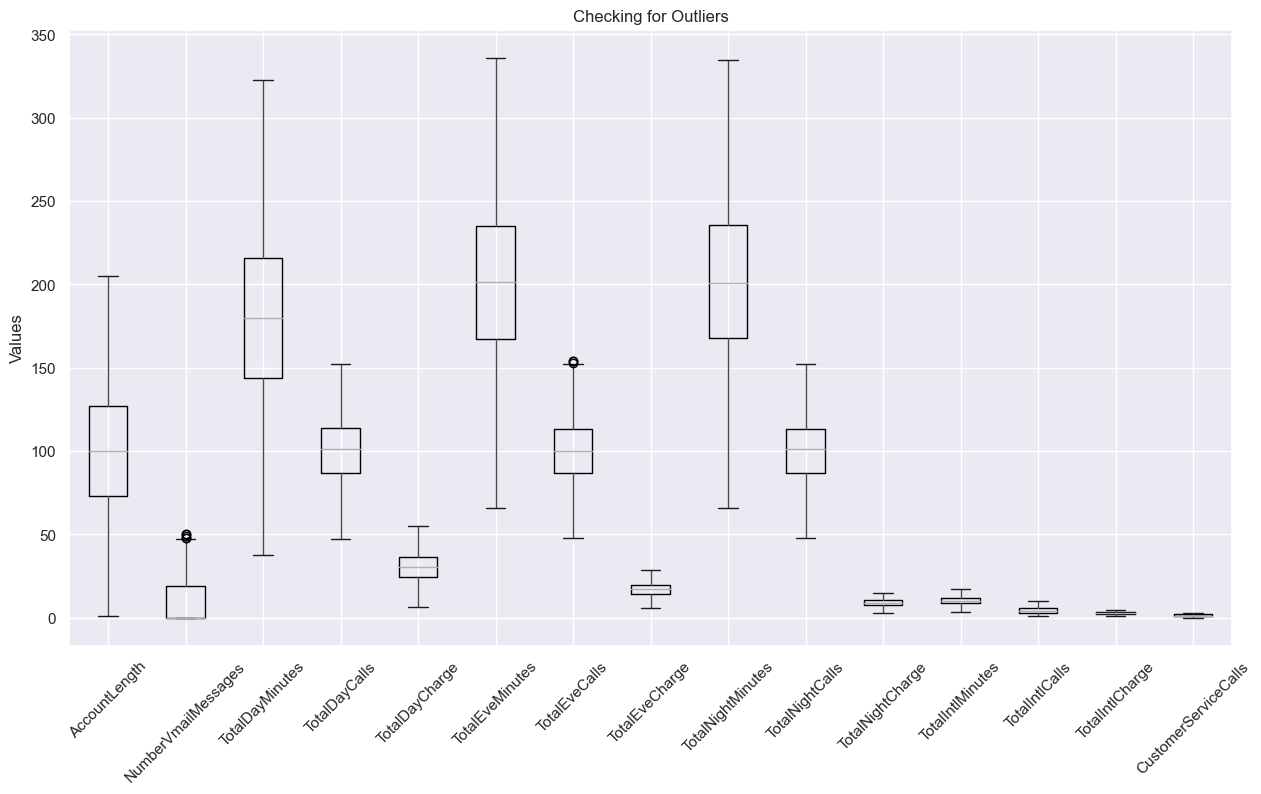

In [18]:
# Generate boxplots for cleaned columns to confirm outliers have been dropped
plt.figure(figsize=(15,8))
df2.boxplot(feature_columns, boxprops=dict(linewidth=1 ))
plt.title('Checking for Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)

                          
plt.show();

# No values outside the IQR showing outliers have been removed

The outliers are now eliminated, and the columns are cleaned; we can go ahead and start EDA. But first we save the clean dataframe to a CSV and make a copy of the same.

In [19]:
# save the clean dataframe in csv format
df2.to_csv('telco_churn_clean.csv',index=False)

In [20]:
# create a copy of the clean dataframe
df2=df2.copy(deep=True)

### 2.3 Exploratory Data Analysis

I will perform various univariate, bivariate and multivariate data analysis to better understand the data, These will include:-

+ **Summary Statistics:** To get a quick overview of the central tendency and dispersion of the dataset's distribution.
+ **Correlation Matrix:** To understand the relationships between nemerical features
+ **Histograms:** To understand numerical features distributions
+ **Pair plot:** To visualize the pairwise relationships between features
+ **Scatter Plots:** Examine relationships and patterns for key feature pairs
+ **Class Distribution:** Analyze the distribution of the target variable churn
+ **Random Forest Feature Importance:** To identify important features


In [21]:
# Load the clean dataset and create a new dataframe
data = pd.read_csv('telco_churn_clean.csv')
data.head()

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,TotalNightCharge,TotalIntlMinutes,TotalIntlCalls,TotalIntlCharge,CustomerServiceCalls,Churn,InternationalPlan_yes,VoiceMailPlan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
4,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AccountLength          2797 non-null   int64  
 1   NumberVmailMessages    2797 non-null   int64  
 2   TotalDayMinutes        2797 non-null   float64
 3   TotalDayCalls          2797 non-null   int64  
 4   TotalDayCharge         2797 non-null   float64
 5   TotalEveMinutes        2797 non-null   float64
 6   TotalEveCalls          2797 non-null   int64  
 7   TotalEveCharge         2797 non-null   float64
 8   TotalNightMinutes      2797 non-null   float64
 9   TotalNightCalls        2797 non-null   int64  
 10  TotalNightCharge       2797 non-null   float64
 11  TotalIntlMinutes       2797 non-null   float64
 12  TotalIntlCalls         2797 non-null   int64  
 13  TotalIntlCharge        2797 non-null   float64
 14  CustomerServiceCalls   2797 non-null   int64  
 15  Chur

#### 2.3.1 Summary Statistics

In [30]:
# Get descriptive statistics for the non-binary nemeric columns
desc_columns = [col for col in data.columns if col not in ['Churn','InternationalPlan_yes','VoiceMailPlan_yes'] 
                   and data[col].dtype in [np.int64, np.float64]]
data[desc_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AccountLength,2797.0,100.392206,39.329033,1.00,73.00,100.00,127.00,205.00
NumberVmailMessages,2797.0,8.131212,13.707224,0.00,0.00,0.00,19.00,50.00
TotalDayMinutes,2797.0,179.995817,52.589516,37.70,144.00,179.80,216.00,322.50
TotalDayCalls,2797.0,100.577047,19.284581,47.00,87.00,101.00,114.00,152.00
TotalDayCharge,2797.0,30.599828,8.940156,6.41,24.48,30.57,36.72,54.83
TotalEveMinutes,2797.0,201.288059,49.042830,66.00,167.20,201.40,235.10,336.00
TotalEveCalls,2797.0,100.020379,19.225656,48.00,87.00,100.00,113.00,154.00
TotalEveCharge,2797.0,17.109714,4.168704,5.61,14.21,17.12,19.98,28.56
TotalNightMinutes,2797.0,201.175366,48.827301,65.70,167.60,201.10,235.80,334.70
TotalNightCalls,2797.0,100.047193,19.052069,48.00,87.00,101.00,113.00,152.00


The summary statistics show some variability in the local  minutes/calls as well as in voicemail messages. The number of Customer service calls made are surprisingly not many, with the maximum number of calls being 3.

#### 2.3.2 Correlation Matrix

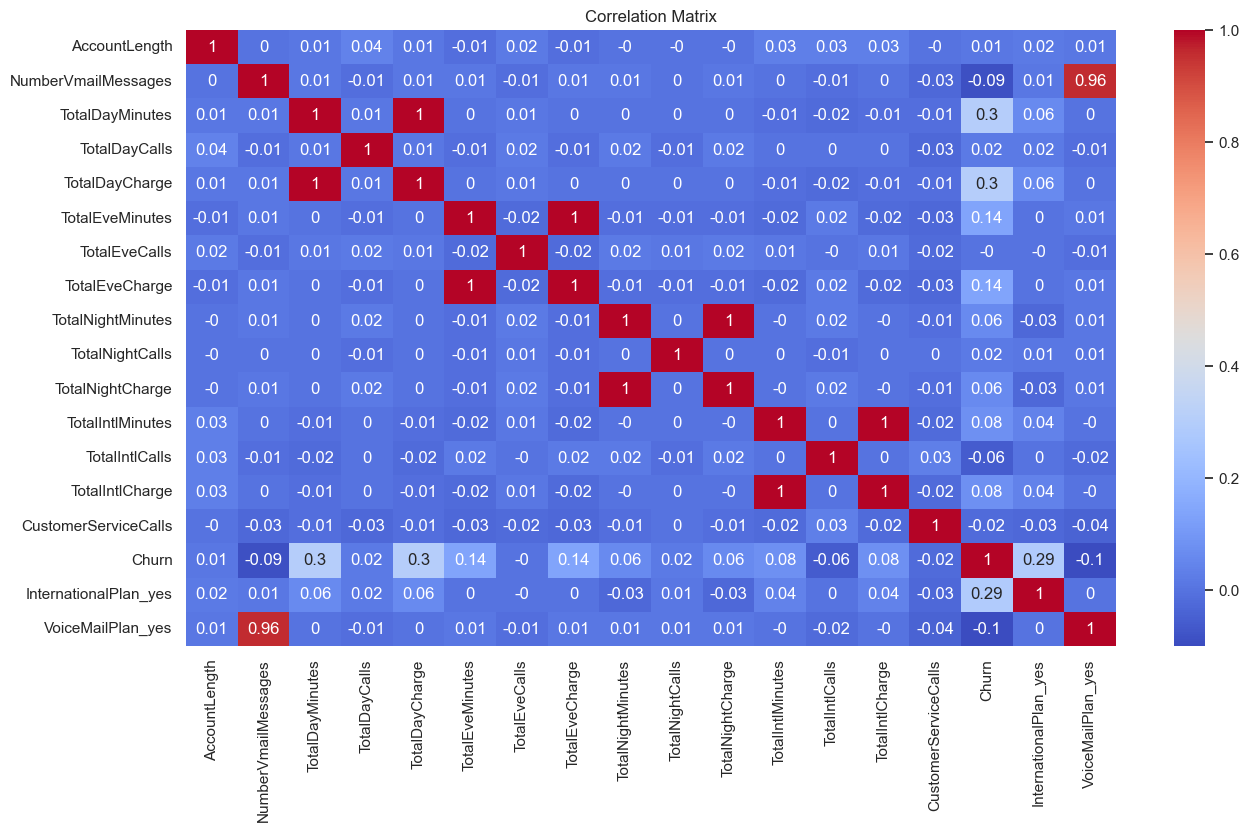

In [33]:
# Calculate the correlation matrix
corr_matrix = data.corr().round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Not surprisingly, the total (day,evening,night international) minutes have a perfect linear relationship with the total(day,evening,night,international) charges. Beong on a voice plan is also very correlated to the number of voice mail minutes. This **multicollinearity** can impact model performance and interpretability. Highly correlated predictors can contribute to overfitting where the model performs well on training dat but poory on unseen data.  Proposed remedy is to drop one of the correlated predictors form the model.

#### 2.3.3 Histograms

In [ ]:
# List 
numerical_cols = 